# Lesson #8 -- R and ggplot2

Last week we were introduced to *R* and four packages included in the tidy verse. These packages focused on loading datasets into *R* and different function used for manipulating and processing data. 

Now that our data is processed, we can learn this week how to make figures using *ggplot*.

Let's start by opening a new [R in Colaboratory notebook](https://colab.to/r), and then load in the *tidyverse*.

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



We see that *ggplot2* is one of the packages that is included in the *tidyverse* package. 

Let's upload some data and jump in!

A quick and helpful command, especially as your datasets begin to get larger. You can used the *head()* command to only call the first 10 rows of your dataset. This way, you can get a sense of the column heads and structure of the data.

In [ ]:
data <- read_csv("/content/Lesson_8_EJ_Data.csv")
head(data)

Rows: 2340 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): State, id, Part_Sec, Part_Position, Part_Position_2
dbl (7): Year, Month, Satem_Num, Ann, Discuss, Ask, Answer

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


State,id,Year,Month,Satem_Num,Part_Sec,Part_Position,Part_Position_2,Ann,Discuss,Ask,Answer
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
MD,2011_10,2011,10,5,APP,Public Interest 1,Public_1_No_1,1,0,0,0
MD,2011_10,2011,10,6,APP,Public Interest 1,Public_1_No_1,1,0,0,0
MD,2011_10,2011,10,7,DEL,Staff,Staff_No_1,0,1,0,0
MD,2011_10,2011,10,8,APP,Public Interest 1,Public_1_No_1,0,1,0,0
MD,2011_10,2011,10,9,DEL,Staff,Staff_No_1,0,1,0,0
MD,2011_10,2011,10,10,DEL,Staff,Staff_No_1,0,1,0,0


Now that we have a better understanding of the structure, let's complete similar manipulations to what you executed on last weeks homework. We will create a new variable names *Ask_Answer*, we will group the data by *Year, id, Part_Position, Part_Sec*, and we will find the total number of statements, announcements, discussion statements, and ask-answer statements. 

In [ ]:

data2 <- data %>%
  mutate(Ask_Answer = Ask + Answer)%>%
  group_by(Year, id, Part_Position, Part_Sec) %>%
  summarise(t_statm = n(),t_Ann = sum(Ann), t_Discuss = sum(Discuss), t_Ask_Answer = sum(Ask_Answer)) 

data2

Since there seems to be a bit of confusion regarding the *group_by()* command, let's discuss it further. 

*group_by()* is telling *R* how to aggregate the data in the *summarise()* command.

To start, let's take the command out completely:

In [ ]:
data2 <- data %>%
  mutate(Ask_Answer = Ask + Answer)%>%
  # group_by(Year, id, Part_Position, Part_Sec) %>%
  summarise(t_statm = n(),t_Ann = sum(Ann), t_Discuss = sum(Discuss), t_Ask_Answer = sum(Ask_Answer)) 

data2

t_statm,t_Ann,t_Discuss,t_Ask_Answer
<int>,<dbl>,<dbl>,<dbl>
2340,816,906,572


We see there is now no aggregation. We have each of the summarize commands executed for the full dataset. 

Next we can execute the same *group_by()* command as the homework:

In [ ]:
data2 <- data %>%
  mutate(Ask_Answer = Ask + Answer)%>%
  group_by(Part_Position) %>% #Year, id, , Part_Sec
  summarise(t_statm = n(),t_Ann = sum(Ann), t_Discuss = sum(Discuss), t_Ask_Answer = sum(Ask_Answer)) 

data2

Now the summarize executions are aggregated only to the *Position* level. Thus, *group_by* is the command you want to use to set the level of aggregation for the summarise executions.


But, for the time being, we are interested in the number of different statements that each position is engaging in over time, so we will add the time components back in (i.e., Year and id).

In [ ]:

data2 <- data %>%
  mutate(Ask_Answer = Ask + Answer)%>%
  group_by(Year, id, Part_Position, Part_Sec) %>%
  summarise(t_statm = n(),t_Ann = sum(Ann), t_Discuss = sum(Discuss), t_Ask_Answer = sum(Ask_Answer)) 

data2

Now that we have our dataset, let's put together a basic plot. I like to start with the most basic plot, see what the output is, and then add layers from there.

Given our data, let's make a plot that shows the different number of total statements put each position across all meetings. To do that we can use the following set up:
```
ggplot(data = d, mapping = aes(x = column_x, y = column_y))
```

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm))

There are a few things that are wrong here, but let's start with the most obvious -- there is not data being plotted.

While we have identified the dataset and the parameters for the x- and y-axis, we have not actually instructed *ggplot* how to plot those parameters. For that we will as a layer. *ggplot* is built on this layer system, much like the pipe used by *dplyer* and *tidyr*. To add a layer, we simply end the previous line with a:

```
+
```

Furthermore, let's plot this data as individual points on the plot. This way, each point represents the number of statements across each meeting for each position. 

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_point()

We have data! So what else should we adjust?

Well, we can't read the labels of our x-axis. Using the *theme()* command we can adjust the text to be vertical.

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_point() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

A quick note on *vjust* and *hjust*.

*v* stands for vertical and *h* stands for horizontal.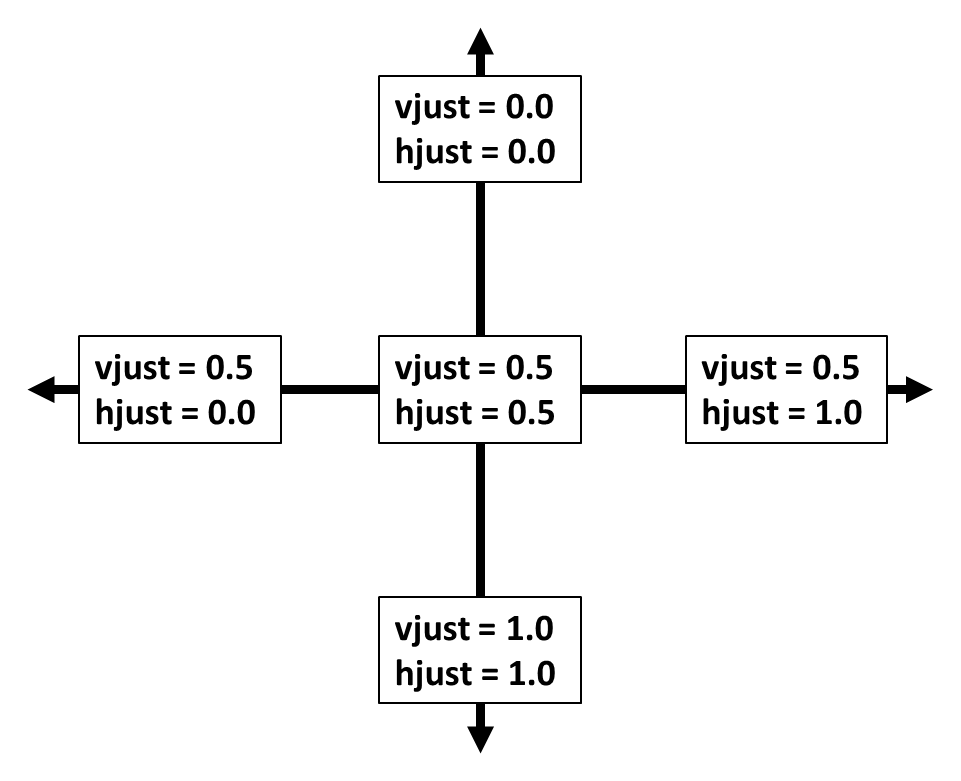

As the figure above shows, the alignment of the text is associated with the 0 (left-align or top-align), 0.5 (center-align or middle-align), and 1.0 (right-align or bottom-align). 

BUT -- since we rotated our text, or orientation has also shifted.

Let's play with the *hjust* alignment. Let's start with 0.

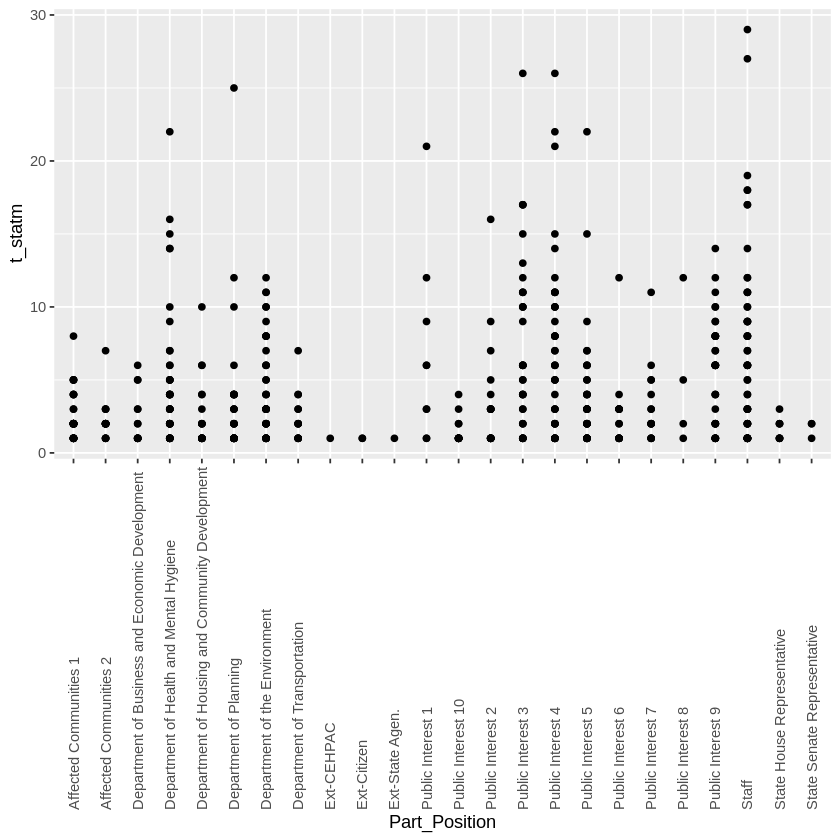

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_point()+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0))

... and 0.5.

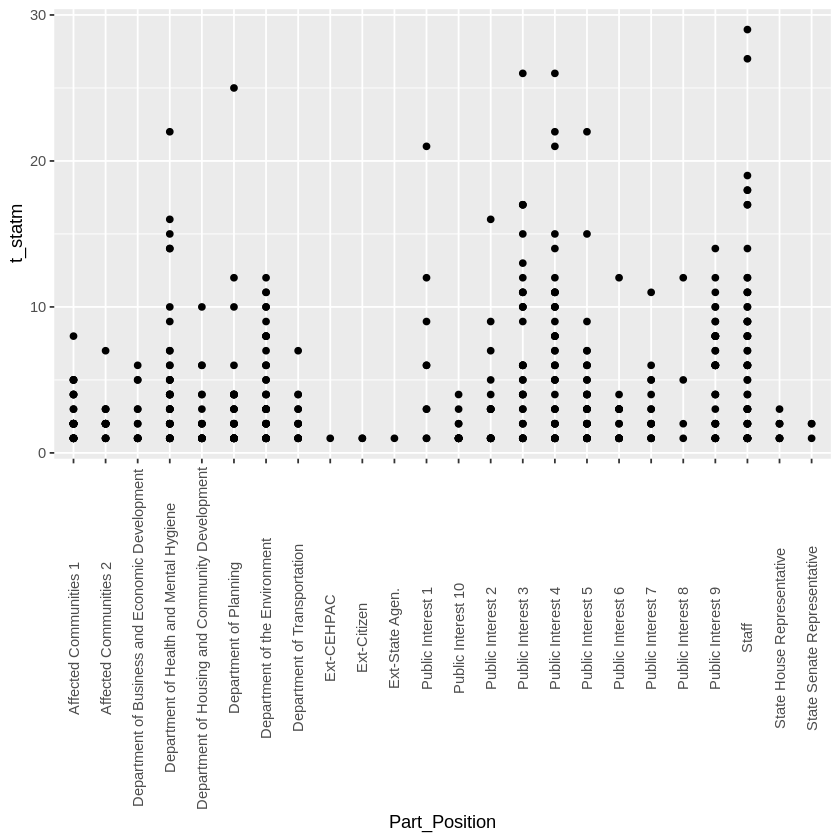

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_point()+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5))

... and now back to 1.0.

It's getting better!

Since many of the meetings have the same count of statements for an individual participant, the points given in the graph do not give a great representation of how frequently the datapoint is observed. For instance, the staff position could have ten observations of 10 statements and one observation of one statement -- or vice versa. Given the figure, we currently can't tell.

We can change *geom_point()* to *geom_point()*, so the datapoints are 'jittered' and do not overlap.

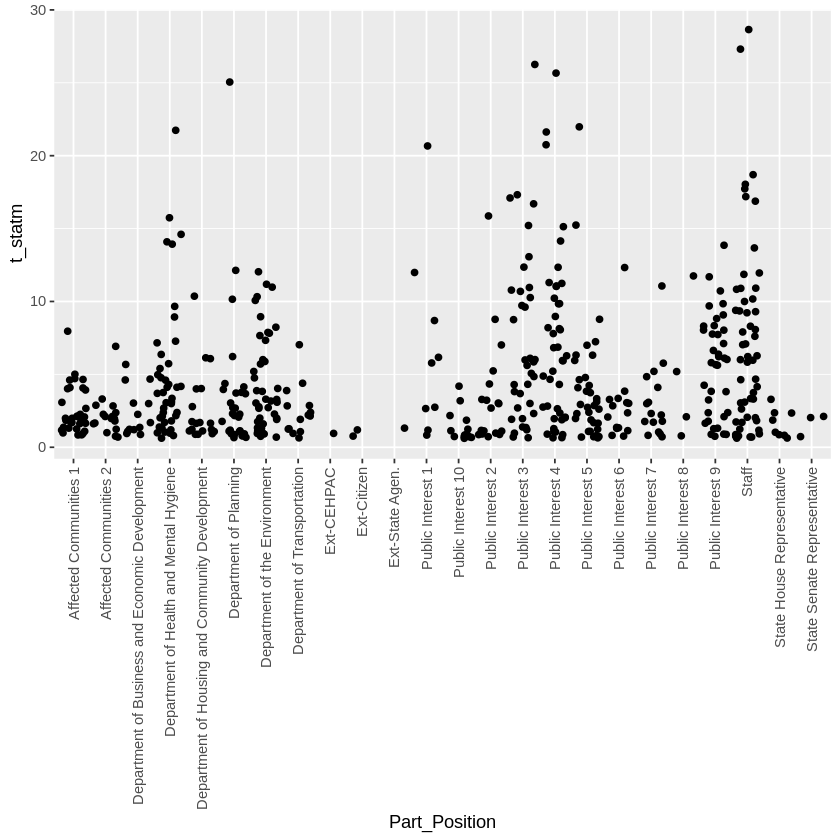

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_jitter()+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1.0))

Let's add some color, with each position being a different color. This will help us see which jittered data points are whose.

We can use the *aes()*, or the aesthetic command, to assign color to the points. We can then identify the unit that differentiates the color differences. *ggplot* will randomly assign color for us.

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_jitter(aes(color = Part_Position)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Before, dealing with the legend problem we have now created, let's play with the *aes()* command.

We can change how we asign the color. We can swithch it to *t_statm*.  

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_jitter(aes(color = t_statm)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Now the legend is more helpful and shows us the gradient differences relative to the data set as a whole.

But let's go back to the color assignment based on position and solve the prior legend problem.

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_jitter(aes(color = Part_Position)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

As we can see, the legend is bigger than the figure. Plus, the information is redundant. The positions are already labeled in the x-axis -- we do not need a legend to tell us the same thing. Let's get rid of the legend by layering on another *theme()* command.

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_jitter(aes(color = Part_Position)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    theme(legend.position="none")

Since we have begun layering, let's keep going.

Maybe we want to layer a box plot on top of the jittered data points. This will give us a slightly more statistically driven representation of the data.

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_jitter(aes(color = Part_Position)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    theme(legend.position="none")+
    geom_boxplot()

As we can see, order matters for layering. While the boxplots are nice, they cover up many of our datapoints. Let's change the order.

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_boxplot() +
    geom_jitter(aes(color = Part_Position)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    theme(legend.position="none")

Hmm ... slightly better, but also kinda busy.

With the 'plug and play' orientation of ggplot, we can keep on tinkering until we get what we want. For instance, we can make the jittered data points more opaque by placing the *alpha* attribute in the *geom_jitter()* command. 

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_boxplot() +
    geom_jitter(alpha = 0.3, aes(color = Part_Position)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    theme(legend.position="none")

Much better!

Now let's finish the figure by renaming the x- and y- axis labels as well as the title.  We can do this by layering in the *labs()* command.

As a rule of thumb, I have always been told to and the *theme()* commands last, so we will place our *labs()* command before them.

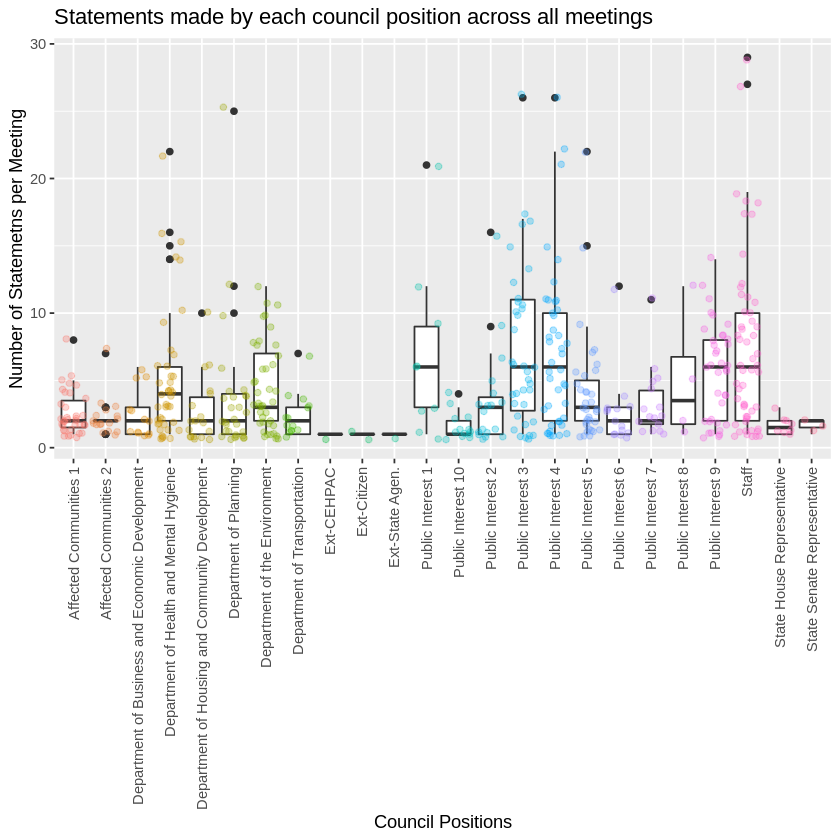

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_boxplot() +
    geom_jitter(alpha = 0.3, aes(color = Part_Position)) +
    labs(
      title = "Statements made by each council position across all meetings",
      x = "Council Positions",
      y = "Number of Statemetns per Meeting") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    theme(legend.position="none")

Finally, let's make our title a bit more distinct as well as center it on the figure. 

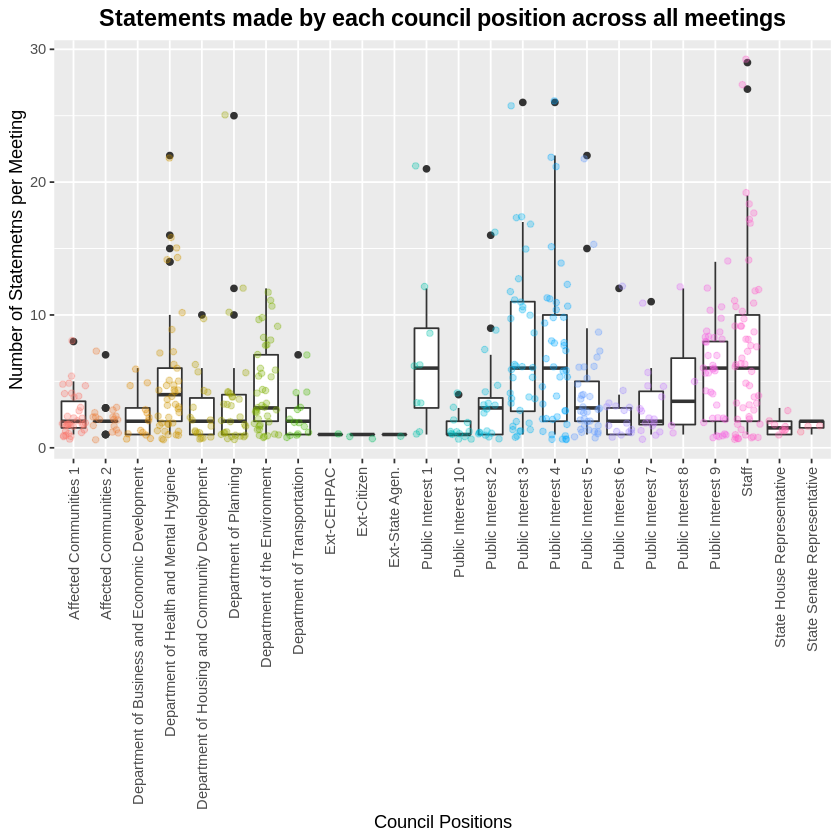

In [ ]:
ggplot(data = data2, mapping = aes(x = Part_Position, y = t_statm)) +
    geom_boxplot() +
    geom_jitter(alpha = 0.3, aes(color = Part_Position)) +
    labs(
      title = "Statements made by each council position across all meetings",
      x = "Council Positions",
      y = "Number of Statemetns per Meeting")+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    theme(legend.position="none") + 
    theme(plot.title = element_text(face = "bold", size =14, hjust = 0.5))

Now let's save it. Right click on the figure and click 'save image as...' 

Given the same data, we can also take a step back and think about our data over time. For instance, maybe we are interested in observing the name of statements by both the statement types and sector across each year.

We have to start by re-manipulating our data.

In [ ]:
data3 <- data %>%
  mutate(Ask_Answer = Ask + Answer)%>%
  group_by(Year, Part_Sec, Part_Position) %>%
  summarise(t_statm = n(), t_Ann = sum(Ann), t_Discuss = sum(Discuss), t_Ask_Answer = sum(Ask_Answer)) %>%
  ungroup() %>%
  group_by(Year, Part_Sec) %>%
   

data3

We are getting *NAs* in our standard deviation calculations. 

Let's think about order. By calculating the sum of the column first, there is no variation level when the column is passed on to the standard deviation calculation.

We can solve this by flipping the standard deviation and sum calculations.

In [ ]:
data3 <- data %>%
  mutate(Ask_Answer = Ask + Answer)%>%
  group_by(Year, Part_Sec, Part_Position) %>%
  summarise(t_statm = n(), t_Ann = sum(Ann), t_Discuss = sum(Discuss), t_Ask_Answer = sum(Ask_Answer)) %>%
  ungroup() %>%
  group_by(Year, Part_Sec) %>%
  summarise(sd_statm = sd(t_statm), t_statm = sum(t_statm), sd_Ann = sd(t_Ann), t_Ann = sum(t_Ann), sd_Discuss = sd(t_Discuss), t_Discuss = sum(t_Discuss), sd_Ask_Answer = sd(t_Ask_Answer), t_Ask_Answer = sum(t_Ask_Answer))

data3

Now that the data looks right, let's make a basic line graph.

In [ ]:
ggplot(data = data3, mapping = aes(x = Year, y = t_statm, group = Part_Sec)) +
  geom_line() +
  geom_point()

Let's add some color so the lines look distinct. We can do this as we did before using *aes(color = X))*.

In [ ]:
ggplot(data = data3, mapping = aes(x = Year, y = t_statm, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec))+
  geom_point(aes(color = Part_Sec))

Since the lines overlap at times, we can also change the 'line type' to make one dashed. This will allow us to see both lines when they are overlapping.

In [ ]:
ggplot(data = data3, mapping = aes(x = Year, y = t_statm, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec))

If we are not happy with the colors that are given to us, we can change the palette of colors. There are both built in palettes and ways to construct our own. Let's start with a built in palette using:

```
scale_color_brewer(palette="X")
```

[R Color Brewer](https://r-graph-gallery.com/38-rcolorbrewers-palettes.html) offers many stock palettes to chose from. We will use "Dark2".

In [ ]:
ggplot(data = data3, mapping = aes(x = Year, y = t_statm, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec)) + 
  scale_color_brewer(palette="Dark2")

If we are still not happy, we can make or own palette using:
```
scale_color_manual(values=c("a", "b",...))
```

In the values list, we can place either specific [HEX Codes for colors](https://www.stat.ubc.ca/~jenny/STAT545A/block14_colors.html#hexadecimal-rgb-color-specification) or name the color directly. 

In [ ]:
ggplot(data = data3, mapping = aes(x = Year, y = t_statm, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec)) + 
  scale_color_manual(values=c("#999999", "red"))

Since we have calculated the standard errors, we can add error bars to or graph using:
```
geom_errorbar(aes(ymin=(y_point-y_sd), ymax=(y_point-y_sd)))
```

In [ ]:
ggplot(data = data3, mapping = aes(x = Year, y = t_statm, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec)) + 
  geom_errorbar(aes(ymin=(t_statm-sd_statm), ymax=(t_statm+sd_statm),color = Part_Sec), width=.1) + 
  scale_color_manual(values=c("#999999", "red"))

Finally, let's add each year to the x-axis using:

```
scale_x_continuous(n.breaks=num_of_years)
```

Since we know we have 11 years in our dataset, we can use 11 as our n.breaks value.

In [ ]:
ggplot(data = data3, mapping = aes(x = Year, y = t_statm, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec)) + 
  geom_errorbar(aes(ymin=(t_statm-sd_statm), ymax=(t_statm+sd_statm),color = Part_Sec), width=.1) + 
  scale_color_manual(values=c("#999999", "red"))+
  scale_x_continuous(n.breaks=11)

There is one last command I would like to show you: 

```
facet_wrap( ~ group)
```

Currently, we are only plotting the total number of statements  over time, but say we are interested in presenting the number of statements across each of our statement types.

First, we need to restructure our data to get all of these individual columns into the same column using *pivot_long()*. Once set up correctly, we can adjust our *ggplot* code.

In [ ]:
data4 <- data3 %>%
  ungroup() %>%
  group_by(Year, Part_Sec) %>%
  pivot_longer(cols = c(starts_with("t_"), starts_with("sd_")),
                names_to = c('.value', 'type'),
                names_pattern = '(.*?)_(.*)')

data4

Now let's change our previous code where:


*   t_statm --> t
*   sd_statm --> sd



In [ ]:
ggplot(data = data4, mapping = aes(x = Year, y = t, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec)) + 
  geom_errorbar(aes(ymin=(t-sd), ymax=(t+sd),color = Part_Sec), width=.1) + 
  scale_color_manual(values=c("#999999", "red"))+
  scale_x_continuous(n.breaks=11)

ERROR: ignored

It Looks a bit crazy, since all for types of communication are being plotted in the same year. This is where we can add *facet_wrap()*

In [ ]:
ggplot(data = data4, mapping = aes(x = Year, y = t, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec)) + 
  geom_errorbar(aes(ymin=(t-sd), ymax=(t+sd),color = Part_Sec), width=.1) + 
  scale_color_manual(values=c("#999999", "red"))+
  scale_x_continuous(n.breaks=11)+ 
  facet_wrap( ~ type)

Let's finalize this figure by restructuring out facets, by adding an *ncol* attribute of the number of columns, as well as adding a title and axis labels.

In [ ]:
ggplot(data = data4, mapping = aes(x = Year, y = t, group = Part_Sec)) +
  geom_line(aes(color = Part_Sec, linetype = Part_Sec), size=1) +
  geom_point(aes(color = Part_Sec)) + 
  geom_errorbar(aes(ymin=(t-sd), ymax=(t+sd),color = Part_Sec), width=.1) + 
  scale_color_manual(values=c("#999999", "red"))+
  scale_x_continuous(n.breaks=11)+ 
  facet_wrap( ~ type, ncol=1)+
    labs(
      title = "Types of statements made by each sector across time",
      x = "Years",
      y = "Number of Statemetns per Year")+ 
    theme(plot.title = element_text(face = "bold", size =14, hjust = 0.5))